# Ngombe-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'NGO'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [4]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '"""+style+"""%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [5]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
NGO            23.0
NGO (?)        26.0
NGO/MBA (?)     4.0
All            53.0
Name: objID, dtype: float64

In [6]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], columns = 'Typ', aggfunc = np.sum, fill_value = '')
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl                     Gewicht  \
Typ                                           NGO NGO (?) NGO/MBA (?)     NGO   
ort_fluss     Ort                   bef_nr                                      
Likwala-Esobe Bojenjo (Fpl. 292)    87/101                          1           
              Bokuma (Fpl. 295)     87/101              2                       
              Boleko (Fpl. 285)     87/101      2       2                 966   
              Boyenge (Fpl. 284)    87/101                          1           
              Jeke (Fpl. 303)       87/101              1                       
Sangha        Bokonongo (Fpl. 250)  87/102      3                         430   
              Inyenge (Fpl. 249)    87/101              1                       
                                    87/102      2                         294   
              Loboko (Fpl. 248)     87/101              1                       
              Mandombe (Fpl. 259)   87/101              1                       
              Monjolomba (Fpl. 243) 87/101      4       9                 149   
              Ngombe (Fpl. 252)     87/102      5                        3525   
              Sosolo (Fpl. 241)     87/101      7       5               666.1   
Zaire/Kongo   Gombe (Fpl. 237)      87/101                          1           
              Maberu (Fpl. 235)     87/101              6                       
              Sungu (Fpl. 236)      87/101                          1           

                                                                
Typ                                        NGO (?) NGO/MBA (?)  
ort_fluss     Ort                   bef_nr                      
Likwala-Esobe Bojenjo (Fpl. 292)    87/101                  10  
              Bokuma (Fpl. 295)     87/101     520              
              Boleko (Fpl. 285)     87/101     106              
              Boyenge (Fpl. 284)    87/101                  20  
              Jeke (Fpl. 303)       87/101      14              
Sangha        Bokonongo (Fpl. 250)  87/102                      
              Inyenge (Fpl. 249)    87/101      20              
                                    87/102                      
              Loboko (Fpl. 248)     87/101       9              
              Mandombe (Fpl. 259)   87/101      12              
              Monjolomba (Fpl. 243) 87/101     127              
              Ngombe (Fpl. 252)     87/102                      
              Sosolo (Fpl. 241)     87/101     167              
Zaire/Kongo   Gombe (Fpl. 237)      87/101                  16  
              Maberu (Fpl. 235)     87/101     250              
              Sungu (Fpl. 236)      87/101                  69

In [132]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)

Anzahl Fundorte:

In [133]:
len(df_pivot.index)

16

Anzahl Stücke:

In [134]:
np.sum(df_pivot['Anzahl'])

55

Gewicht insgesamt in kg:

In [135]:
np.sum(df_pivot['Gewicht']) / 1000

7.370100000000001

### Scherbentypen

In [136]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,6.0,10.909091
R,21.0,38.181818
W,28.0,50.909091
B,0.0,0.000000


In [137]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale (*fabrics*)

In [138]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like 'NGO%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [139]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


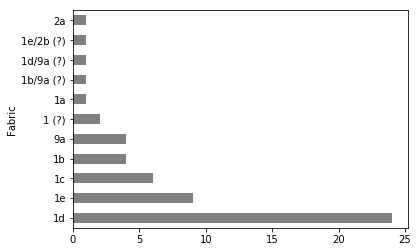

In [140]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [141]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1d,24,44.444444
1e,9,16.666667
1c,6,11.111111
1b,4,7.407407
9a,4,7.407407


In [142]:
a = pd.Series({'Schamott':len(df.loc[df['Fabric'].str.contains("9")].index),
               'Rest':len(df.loc[~df['Fabric'].str.contains("9")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rest,46,88.461538
Schamott,6,11.538462


In [143]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,31.0,77.5
wenig,5.0,12.5
mittel,2.0,5.0
viel,2.0,5.0
sehr viel,NaN,NaN


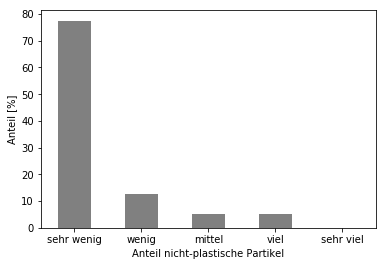

In [144]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [145]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,28,70.0
F,2,5.0
M,6,15.0
C,1,2.5
VC,3,7.5


In [146]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [147]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,32,80.0
Schamott,4,10.0
S/Org,2,5.0
S/Schamott,2,5.0


### Schamott-Magerung

In [148]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) Like '%9%')
           AND ((t_Obj.Typ) Like 'NGO%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,objID,Ort,Anzahl,MagerungGröße,MagerungArt,MagerungDichte,Fabric,Typ
0,1172,Sosolo (Fpl. 241),1,VC,Schamott,viel,9a,NGO
1,1173,Sosolo (Fpl. 241),1,VC,Schamott,mittel,9a,NGO
2,1252,Monjolomba (Fpl. 243),1,M,Schamott,wenig,1d/9a (?),NGO
3,1857,Sosolo (Fpl. 241),1,VC,Schamott,viel,9a,NGO
4,1998,Sosolo (Fpl. 241),1,M,S/Schamott,wenig,9a,NGO (?)
5,4319,Monjolomba (Fpl. 243),1,C,S/Schamott,mittel,1b/9a (?),NGO


### Brennfarbe

In [149]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like 'NGO%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,0,0.000000
Sonstig,16,30.769231
Weiß,36,69.230769


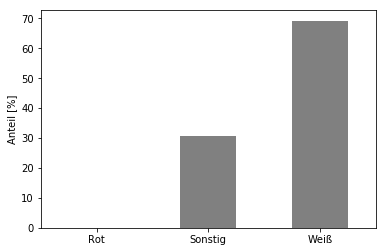

In [150]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [151]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

       38
g      10
        9
bg      7
s       4
 bg     2
g s     1
bg      1
s g     1
g       1
dtype: int64

### Oberfläche der Scherben

In [152]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE 'NGO%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
glatt,34,85.0
"glatt, seifig",1,2.5
glatt/leicht rau,1,2.5
leicht rau,4,10.0


### Wandungsdicke

In [153]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE 'NGO%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


In [154]:
df['Wandung'].describe()

count    39.000000
mean      6.871795
std       1.921889
min       3.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      12.000000
Name: Wandung, dtype: float64

In [155]:
df['Wandung'].var()

3.693657219973008

## Gefäßformen

In [156]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'NGO%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [157]:
# alles fragliche einfach abschneiden und nur 1. Variante behalten:
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Gef'] = df['Form_Gef'].apply(lambda x: x.split('/')[0])

In [158]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [159]:
df_pivot['objID'].sum()

40

In [160]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,0,0.0
sicher,40,100.0


In [161]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

### Proportionen

In [2]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'NGO%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['maxD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

In [3]:
a = df.loc[df['Form_Gef'].str.contains("D2")] 
b = df.loc[df['Form_Gef'].str.contains("J1")] 
c = df.loc[df['Form_Gef'].str.contains("F4")] 
d = df.loc[~df['Form_Gef'].str.contains("D2|F4|F6|J1")]
e = df.loc[df['Form_Gef'].str.contains("F6")] 

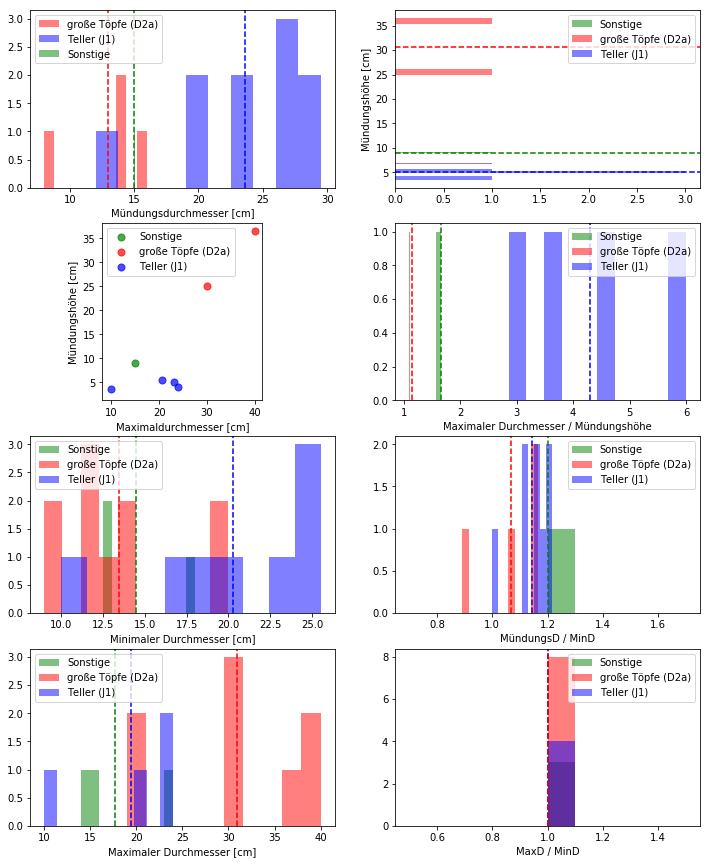

In [4]:
fig = plt.figure(1)
fig.set_size_inches(12,15)

ax = plt.subplot(421)

a['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (D2a)', alpha = 0.5)
b['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (J1)', alpha = 0.5)
c['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Sonstige', alpha = 0.5)

plt.axvline(c['muendungsD'].mean(), color='g', linestyle = '--')
plt.axvline(b['muendungsD'].mean(), color='b', linestyle = '--')
plt.axvline(a['muendungsD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

#df['muendungsD'].hist(histtype='stepfilled')
plt.xlabel("Mündungsdurchmesser [cm]")
plt.legend(loc = 2)

ax = plt.subplot(422)

c['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Sonstige', alpha = 0.5, orientation='horizontal')
a['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (D2a)', alpha = 0.5, orientation='horizontal')
b['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (J1)', alpha = 0.5, orientation='horizontal')

plt.axhline(c['muendungsH'].mean(), color='g', linestyle = '--')
plt.axhline(b['muendungsH'].mean(), color='b', linestyle = '--')
plt.axhline(a['muendungsH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.ylabel("Mündungshöhe [cm]")
plt.legend(loc = 1)

ax = plt.subplot(423)

plt.scatter(c['maxD'], c['muendungsH'], alpha=0.7, c = 'g', s = 50, label = 'Sonstige')
plt.scatter(a['maxD'], a['muendungsH'], alpha=0.7, c = 'r', s = 50, label = 'große Töpfe (D2a)')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.7, c = 'b', s = 50, label = 'Teller (J1)')

ax.set_aspect('equal')

plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax = plt.subplot(424)

c['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Sonstige', alpha = 0.5)
a['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (D2a)', alpha = 0.5)
b['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (J1)', alpha = 0.5)

plt.axvline(c['maxD-muendH'].mean(), color='g', linestyle = '--')
plt.axvline(b['maxD-muendH'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD-muendH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

# df['maxD-muendH'].hist(histtype='stepfilled', fc='#CCCCCC')
plt.xlabel("Maximaler Durchmesser / Mündungshöhe")
plt.legend(loc = 1)

ax = plt.subplot(425)

c['minD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Sonstige', alpha = 0.5)
a['minD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (D2a)', alpha = 0.5)
b['minD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (J1)', alpha = 0.5)

plt.axvline(c['minD'].mean(), color='g', linestyle = '--')
plt.axvline(b['minD'].mean(), color='b', linestyle = '--')
plt.axvline(a['minD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("Minimaler Durchmesser [cm]")
plt.legend(loc = 2)

ax = plt.subplot(426)

c['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Sonstige', alpha = 0.5)
a['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (D2a)', alpha = 0.5)
b['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (J1)', alpha = 0.5)

plt.axvline(c['muend-min'].mean(), color='g', linestyle = '--')
plt.axvline(b['muend-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['muend-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("MündungsD / MinD")
plt.legend(loc = 1)

ax = plt.subplot(427)

c['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Sonstige', alpha = 0.5)
a['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (D2a)', alpha = 0.5)
b['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (J1)', alpha = 0.5)

plt.axvline(c['maxD'].mean(), color='g', linestyle = '--')
plt.axvline(b['maxD'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("Maximaler Durchmesser [cm]")
plt.legend(loc = 2)

ax = plt.subplot(428)

c['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Sonstige', alpha = 0.5)
a['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'große Töpfe (D2a)', alpha = 0.5)
b['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'Teller (J1)', alpha = 0.5)

plt.axvline(c['max-min'].mean(), color='g', linestyle = '--')
plt.axvline(b['max-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['max-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

plt.xlabel("MaxD / MinD")

#plt.savefig('../output/figs/3-1-2-2_NGO_Keramik-Abmessungen.pdf')
plt.show()

In [5]:
df.loc[df['Form_Gef'].str.contains("D2")].pivot_table(values = ['maxD', 'muendungsH'], index = ['Form_Gef'], aggfunc = [len, min, max])

len              min              max           
          maxD muendungsH  maxD muendungsH  maxD muendungsH
Form_Gef                                                   
D2         8.0        8.0  30.0       25.0  40.0       36.5
D2 (?)     6.0        6.0  19.0        NaN  19.0        NaN
E1/D2 (?)  1.0        1.0  21.0        NaN  21.0        NaN

In [6]:
df.loc[df['Form_Gef'].str.contains("J1")].pivot_table(values = ['maxD', 'muendungsH'], index = ['Form_Gef'], aggfunc = [len, min, max])

len              min              max           
          maxD muendungsH  maxD muendungsH  maxD muendungsH
Form_Gef                                                   
J1        10.0       10.0  10.0        3.5  24.0        7.0

In [7]:
d

,Ind,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,Form_Gef,maxD-muendH,muend-min,max-min
14,MDB 87/101:138,NaN,NaN,16.0,NaN,16.5,NaN,NaN,E6,NaN,NaN,1.0
15,MJL 87/101:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E1 (?),NaN,NaN,NaN
19,MJL 87/101:35,NaN,NaN,12.5,NaN,14.0,NaN,NaN,G2/E6 (?),NaN,NaN,1.0
20,MJL 87/101:50,19.0,8.0,17.5,7.0,18.0,3.0,0.0,E6,2.250000,1.085714,1.0
27,SSL 87/101:142,16.5,8.5,15.0,7.0,16.0,4.0,0.0,E6,1.882353,1.100000,1.0
28,SSL 87/101:143,15.5,9.5,14.0,5.5,14.5,3.0,0.0,E6,1.526316,1.107143,1.0
35,MBR 87/101:123,NaN,NaN,NaN,NaN,28.0,NaN,NaN,C2 (?),NaN,NaN,1.0


Knickwandschalen der Longa-Gruppe aus dem ICB:

In [24]:
lon = pd.read_csv("../lit/Wotzka1995_TafObjekte.csv", decimal=",", encoding='Latin1')

lon = lon.ix[(lon["STYLE"] == 'LON') & (lon["GefTyp"] == 'F4')]

lon['muendungsH'] = lon['Pl_muendH_mm'] * 5 / lon['Massstab5cm']
lon['maxD'] = lon['Pl_maxD_mm'] * 5 / lon['Massstab5cm']

lon

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,SITE,FEATURE,OBJECT,STYLE,GefTyp,PG,PL,OBJ,PL_muendD_mm,Pl_muendH_mm,Pl_minD_mm,Pl_minD_H_mm,Pl_maxD_mm,Pl_maxD_H_mm,Pl_BodenD_mm,Massstab5cm,NOTES,muendungsH,maxD
0,NaN,NaN,NaN,LON,F4,455,21,2,NaN,50.0,NaN,NaN,61.5,NaN,0,20.5,Höhe geschätzt,12.195122,15.000000
1,NaN,NaN,NaN,LON,F4,485,51,9,54.0,35.0,50.0,25.0,58.5,19.5,0,15.5,NaN,11.290323,18.870968
2,NaN,NaN,NaN,LON,F4,485,51,10,63.0,41.5,57.5,33.0,65.5,23.0,0,15.5,NaN,13.387097,21.129032
3,NaN,NaN,NaN,LON,F4,501,67,10,55.0,45.0,54.5,38.0,63.0,24.0,0,15.5,Höhe geschätzt,14.516129,20.322581
4,NaN,NaN,NaN,LON,F4,521,87,4,73.5,61.0,68.5,41.0,79.0,31.0,0,20.5,Höhe geschätzt,14.878049,19.268293
5,NaN,NaN,NaN,LON,F4,526,92,6,56.0,47.0,53.0,43.0,61.0,28.0,0,15.5,Höhe geschätzt,15.161290,19.677419


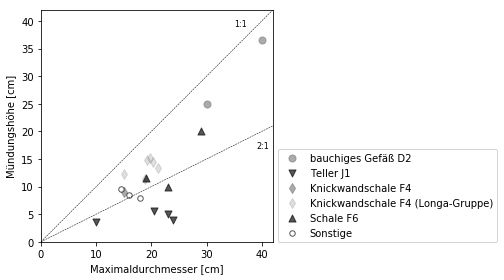

In [48]:
fig = plt.figure(1)
#fig.set_size_inches(10,10)

ax = plt.subplot(111)

plt.scatter(a['maxD'], a['muendungsH'], alpha=0.66, c = 'grey', s = 50, marker = "o", label = 'bauchiges Gefäß D2')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.66, c = 'black', s = 50, marker = "v", label = 'Teller J1')#
plt.scatter(c['maxD'], c['muendungsH'], alpha=0.66, c = 'grey', s = 50, marker = "d", label = 'Knickwandschale F4')

plt.scatter(lon['maxD'], lon['muendungsH'], alpha=0.25, c = 'grey', s = 50, marker = "d", label = 'Knickwandschale F4 (Longa-Gruppe)')

plt.scatter(e['maxD'], e['muendungsH'], alpha=0.66, c = 'black', s = 50, marker = "^", label = 'Schale F6')
plt.scatter(d['maxD'], d['muendungsH'], alpha=0.66, facecolors='white', edgecolors='black', s = 30, marker = "o", label = 'Sonstige')
#plt.legend(loc = 2)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.2))
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,50],[0, 10,20,50], color='black', linestyle = '--', linewidth=0.5)
ax.text(35, 39, '1:1', color='black', fontsize=8)

ax.plot([0, 10,20,50],[0, 5,10,25], color='black', linestyle = '--', linewidth=0.5)
ax.text(39, 17, '2:1', color='black', fontsize=8)

plt.xlim(0,42) 
plt.ylim(0,42) 

ax.set_aspect('equal')
plt.tight_layout()

plt.savefig('../output/figs/3-1-2-2_Ngombe_Keramik-Proportionen.pdf', bbox_inches='tight')
plt.show()

## Bauchform

In [169]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'NGO%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [170]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,15,41.666667
A2,14,38.888889
E1,3,8.333333
D1,2,5.555556
A3,1,2.777778
D1/scharf,1,2.777778


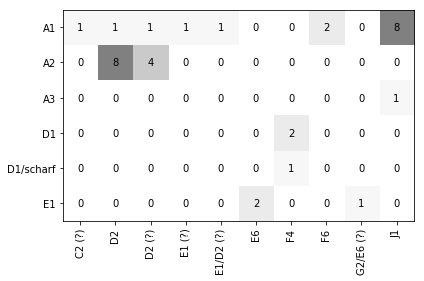

In [171]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

## Mündungs- und Randformen

In [172]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'NGO%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [173]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M1,11,42.307692
M2,8,30.769231
M5,4,15.384615
M1/M2,1,3.846154
M2/M1,1,3.846154
M3,1,3.846154


In [174]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1.5,10,33.333333
B1.1,9,30.000000
B1,3,10.000000
A1.1,1,3.333333
A2 (?),1,3.333333


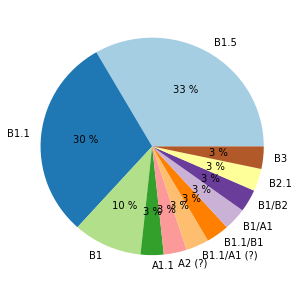

In [175]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

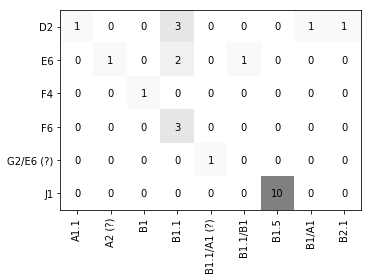

In [176]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
# plt.savefig('output/3-1-1-6_Bobulu_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [177]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
# plt.savefig('output/3-1-1-6_Bobulu_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [178]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

In [179]:
# leere Zellen & X entfernen
b = df['Form_Hals']
b = pd.DataFrame(b)
b = b.dropna()
b = b[b['Form_Hals'] != 'X']
b
# enthält 'kurz' oder nicht
c = pd.Series({'kurz':len(b.loc[b['Form_Hals'].str.contains("kurz")].index),
               'nicht-kurz':len(b.loc[~b['Form_Hals'].str.contains("kurz")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
kurz,3,21.428571
nicht-kurz,11,78.571429


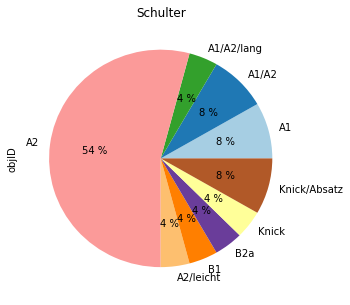

In [180]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Bodenformen

In [181]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'NGO%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
Form_Boden,,
B1,11,84.615385
B1 (?),2,15.384615


In [182]:
len(df['Form_Boden'])

13

## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


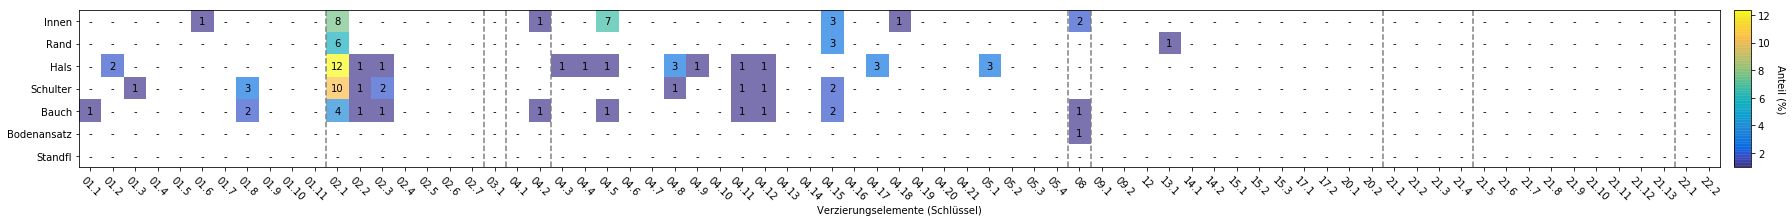

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-2_Ngombe_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [185]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like 'NGO%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [186]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

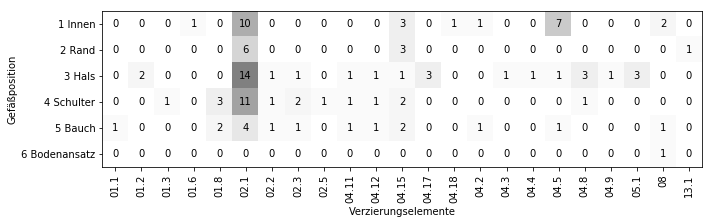

In [187]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
# plt.savefig('output/3-1-1-6_Bobulu_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [188]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


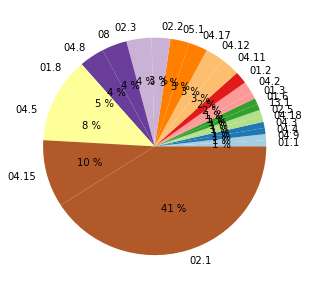

In [189]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')
#plt.title('Mokelo-Gruppe\nGefäßformen')
#plt.savefig('output/3-1-1-3_Mokelo-Gr_GefForm2.pdf')

In [190]:
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.sort_values(by = 'verzName')
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,verzName,objID,Prozent
0,01.1,1,0.909091
10,01.2,2,1.818182
8,01.3,1,0.909091
7,01.6,1,0.909091
19,01.8,5,4.545455
22,02.1,45,40.909091
15,02.2,3,2.727273
16,02.3,4,3.636364
5,02.5,1,0.909091
11,04.11,3,2.727273


In [191]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,25,22.727273
2 Rand,10,9.090909
3 Hals,34,30.909091
4 Schulter,24,21.818182
5 Bauch,16,14.545455
6 Bodenansatz,1,0.909091


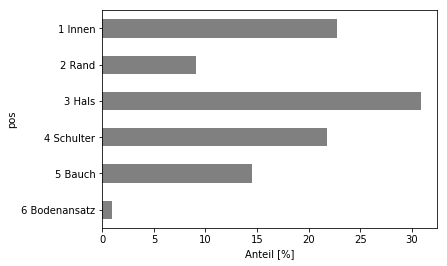

In [192]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

In [193]:
#df_pivot.at['1 Innen','Prozent'] + df_pivot.at['4 Hals','Prozent'] + df_pivot.at['5 Schulter','Prozent']

In [194]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) = '08')
           AND ((t_Obj.Typ) Like 'NGO%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,objID,posID,verzID,pos,verzName,verzBeschr,Typ,Form_Gef
0,1854,9,22,6 Bodenansatz,08,banfwa-nfwa,NGO,F6
1,2213,2,22,1 Innen,08,banfwa-nfwa,NGO (?),None
2,3572,2,22,1 Innen,08,banfwa-nfwa,NGO (?),None
3,6270,7,22,5 Bauch,08,banfwa-nfwa,NGO (?),D2


## Verbreitung

In [2]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
10,Maberu (Fpl. 235),235,17.257014,-1.069018,NGO (?)
0,Bobusa (Fpl. 239),239,16.917098,-1.052349,NGO (?)
5,Sosolo (Fpl. 241),241,17.128605,-0.892241,NGO
3,Monjolomba (Fpl. 243),243,17.174576,-0.684421,NGO
9,Loboko (Fpl. 248),248,17.130913,-0.109189,NGO (?)
2,Inyenge (Fpl. 249),249,17.107470,0.196574,NGO
0,Bokonongo (Fpl. 250),250,17.129437,0.201971,NGO
4,Ngombe (Fpl. 252),252,16.987737,0.368550,NGO
11,Mandombe (Fpl. 259),259,16.522700,1.116917,NGO (?)
6,Boyenge (Fpl. 284),284,17.199855,-0.835253,NGO (?)


In [3]:
df.to_csv("../data/processed/3-1-2-2_NGO_Verbreitung.csv", index = False)

In [4]:
len(df)

15

# Appendix

### NGO 87/101 - NGL 87/101

Bei der Beschriftung der Funde aus der Kampagne von 1987 wurden die Funde aus NGO 87/101 mutmaßlich denen aus NGL 87/101 hinzugefügt (Details siehe Aktenvermerk MKHE 04.06.1990). Daher an dieser Stelle einmal schauen, wie schlimm die Situation ist. Was für Stilgruppen gibt es in NGL 87/101?

In [197]:
# Funde aus NGO 87/101
sql = """SELECT
           t_Obj.objID
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'NGO')
           AND ((t_Komplex.bef_nr) Like '%101%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID


> es liegen keine Stücke aus NGO 87/101 vor!

In [198]:
# Funde aus NGL 87/101
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_name) Like '%Ngoko%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,ort_kurz,bef_nr,ort_fluss,GE,Scherbe,Gewicht,Anzahl,Typ,MagerungGröße,MagerungArt,MagerungDichte,Fabric
0,1281,NGK,87/101,Ngoko,,R,52.7,1,None,,,,None
1,1282,NGK,87/101,Ngoko,,W,53.9,1,None,,rote Partikel,,None
2,1286,NGK,87/101,Ngoko,,W,40.5,1,None,,,,None
3,1288,NGK,87/101,Ngoko,,W,16.2,1,None,,,,None
4,5248,NGK,87/101,Ngoko,,W,29,1,MBJ (?),C,S,viel,4c


In [199]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len)

Typ
               1
KON            5
KON (?)        1
MBJ            4
MBJ (?)        1
MDB            1
MDB (?)        1
PDM            6
PDM (?)        1
PDM/MBJ (?)    1
Name: objID, dtype: int64

* Im ganzen Komplex NGL 87/101 findet sich lediglich eine (mögliche) Scherbe der Ngombe-Gruppe
* darüber hinaus finden sich lediglich Stücke, die sehr gut in das Spektrum vom Ngoko passen

In [200]:
df.pivot_table(values = 'objID', index = 'Fabric', columns = 'Typ', aggfunc = len, fill_value = '')

Typ,,KON,KON (?),MBJ,MBJ (?),MDB,MDB (?),PDM,PDM (?),PDM/MBJ (?)
Fabric,,,,,,,,,,
,1,,,,,,,,,
3c,,1,,1,,,,2,,
4a,,1,,,,1,,,,
4c,,,1,,1,,,1,,
5a,,,,,,,,,,1
5c,,3,,,,,,1,1,
7b,,,,1,,,,,,
7c,,,,1,,,,,,
7d,,,,,,,1,1,,


## Tafeln

In [201]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,objID,Typ,Form_Gef,Form_Rand,Form_Boden
0,29,15,MBR,87/101,NaN,113,6269,NGO (?),D2,None,None
1,29,16,MBR,87/101,NaN,123,6255,NGO (?),C2 (?),None,None
2,30,2,MBR,87/101,NaN,112,6268,NGO (?),D2,None,None
3,30,4,MBR,87/101,NaN,48,6270,NGO (?),D2,None,None
4,32,4,SUN,87/101,NaN,7,6199,NGO/MBA (?),D2,B1.1,None
5,33,1,GMB,87/101,NaN,18,6298,NGO/MBA (?),D2,B2.1,None
6,36,13,SSL,87/101,NaN,126,1181,NGO,F4,None,None
7,36,16,SSL,87/101,NaN,142,1173,NGO,E6,B1.1,None
8,36,17,SSL,87/101,NaN,143,1186,NGO,None,B1.1,None
9,36,17,SSL,87/101,NaN,143,1857,NGO,E6,B1.1,None
